In [70]:
#Useful imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

import sys 
sys.path.append("../../")
from pyACC.Cosmology import Integrand_comoving_distance
from pyACC.Cosmology import comoving_distance

#For a 2D integration and interpolation
from scipy.integrate import dblquad
from scipy.interpolate import interp2d

**Compute cosmological distances**

In this exercise, integration will be applied  in a cosmological context computing cosmological distances.

The basis to compute distances is the Hubble function $H(z)$, which describes the evolution of the backgroud.

For flat $\Lambda$ CDM cosmology it reads:
$$
D_c(z)=\int_0^z \frac{dz'c}{H\left(z'\right)}
$$

Implementing $H(z)$ in different cosmological models allows to define distances in the contenst that is being studied.

From the non observable $D_c(z)$, it is possible to estimate different typologies of distances:
1. Angular diameter distance: $D_A(z)=\frac{D_c(z)}{1+z}$;
2. Luminosity distance: $D_L(z)=D_c(z)\cdot(1+z)$;

It is customary to introduce the "Distance modulus" $m$, definied as the difference between the apparent magnitude and the absolute magnitude of an object.
Trere are two important relations:
1. $m = 5\log_{10}\left(\frac{D_L(z)}{10pc}\right)$;
2. $m = 5\log_{10}\left(\frac{D_C(z)}{10pc}\right)+25$
where distances are expressed in pc and the constant $10 pc$ is chosen so that the distance modulus is on a logarithmic scale.

In [71]:
#Defining Hubble function
Omega_mat = 0.3
H_0       = 67

def Hubble_function(z, Omega_mat, H_0):
    return H_0*(Omega_mat*(1+z)**3+1-Omega_mat)**0.5

In [72]:
#Defining z array
z_min = 0.1
z_max = 2
z_list = np.linspace(z_min, z_max, 100)

In [73]:
#Computing comoving distances 
#List of distances to be filled
d_list = []

# Calculate the comoving distance at each redshift in z_list
for i in range(len(z_list)):
    comoving_distances = comoving_distance(z_list[i], Hubble_function, Omega_mat, H_0)
    d_list.append(comoving_distances)
 
print('Check of d_list length: ', len(d_list))

Check of d_list length:  100


In [74]:
#Computing distance modulus
d_modulus_list = []

for i in range(len(d_list)):
    m = 5*np.log10(d_list[i]*1e5) + 25
    d_modulus_list.append(m)

print('Check of d_modulus_list length: ', len(d_modulus_list))

Check of d_modulus_list length:  100


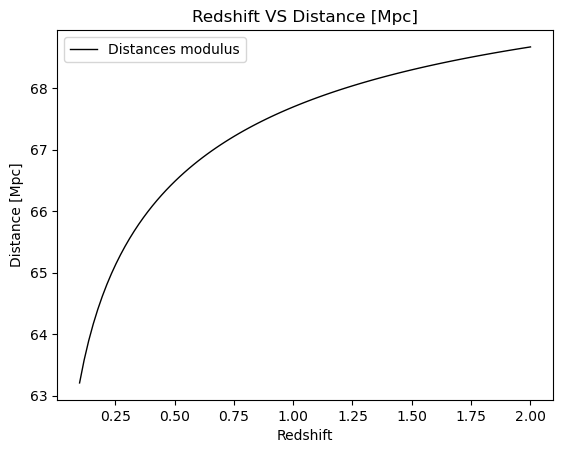

In [75]:
#Printing distances modulus
plt.plot(z_list, d_modulus_list, lw=1, color="k", label="Distances modulus") #lw makes line thicker, scatter instead of plot not to have a line, but points
#WARNING!
#FUN FACT: first attempt, plot was givin few point on the same level! Of course: z is separated by 0.1 and 0.1 was the step of trapezoid, function used to integrate!
plt.title("Redshift VS Distance [Mpc]")
plt.legend()
#plt.xscale('log')
plt.xlabel("Redshift")
plt.ylabel("Distance [Mpc]");


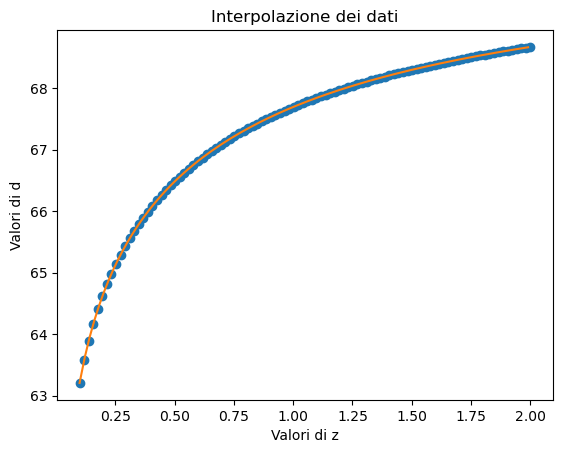

189000
100


In [76]:
#Interpolation 1D
#Function resulting from interpolate
f = interpolate.interp1d(z_list, d_modulus_list, kind='linear', bounds_error='false', fill_value=np.nan) 
#interp1d takes x and y, interpoles with kind; fill_value allows you to define value out of range: in this case, nan

#Wanting to have access to all points f has calculated
delta_z_new = 0.00001

z_list_new = np.arange(z_min, z_max-0.01, delta_z_new)

d_list_new = f(z_list_new)   # use interpolation function returned by `interp1d`

plt.plot(z_list, d_modulus_list, 'o', z_list_new, d_list_new, '-')
plt.xlabel('Valori di z')
plt.ylabel('Valori di d')
plt.title('Interpolazione dei dati')
plt.show()

print(len(z_list_new))
print(len(z_list))

We now want to be able to change all the present parameters, i. e. z, $H_0$ and $\Omega_{mat}$. 
Actually, we won't need to performe a 3 parameters interpolation since:
$m = 5\log_{10}\left(\frac{D_C(z)}{10pc}\right)+25$= $5\log_{10}\left(\int_0^z\frac{dz'}{E(z')}\right)+5\log_{10}\left(\frac{c}{H_0\cdot10pc}\right)+25$, where: 
$$
E\left(z\right) = \sqrt{\Omega_{mat}\cdot(1+z)^3+1-\Omega_{mat}}
$$
This decomposition allows us to interpolate with only two parameters, i.e. z, $\Omega_{mat}$, and then introduce the selected value of $H_0$.

In [77]:
#Defining function E
def E(z, Omega_mat):
    return (Omega_mat*(1+z)**3+1-Omega_mat)**0.5

In [78]:
#Performing a 2D integral

#Definition of the integrand function 
def integrand(z, Omega_mat):
    return E(z, Omega_mat)

# Define the range of z and Omega_mat
z_values         = np.linspace(0, 2, 100)  # Array of z values
Omega_mat_values = np.linspace(0, 1, 100)  # Array of Omega_mat values

# Perform the 2D integration
computed_values = np.zeros((len(z_values), len(Omega_mat_values))) #Prepering to store results of integration for every combination of z and Omega_mat

for i, z in enumerate(z_values):
#This cycle does the following: iterates over the elements of the array of z thanks to i and over the value of those elements
#thanks to z; enumerate allows, from the array, to give the value of i associated to the value of z in the array
    for j, Omega_mat in enumerate(Omega_mat_values):
    #This cycle does the following: iterates over the elements of the array of Omega:mat thanks to j and over the value of those elements
    #thanks to Omega_mat; enumerate allows, from the array, to give the value of j associated to the value of Omega_mat in the array
        computed_values[i, j], _ = 5*np.log10(dblquad(integrand, 0, z, lambda x: 0, lambda x: Omega_mat))+25
        #Computing integral in 2D for all couple of z and Omega_mat
        #x is the dummy variable over which the integral is made
        #lambda is used to fix the range of the second integrale where the range varies over the loop

# Now, 'computed_values' contains the integrated values over the grid of z and Omega_mat values

/tmp/ipykernel_2126/1075904309.py:20: RuntimeWarning: divide by zero encountered in log10
  computed_values[i, j], _ = 5*np.log10(dblquad(integrand, 0, z, lambda x: 0, lambda x: Omega_mat))+25


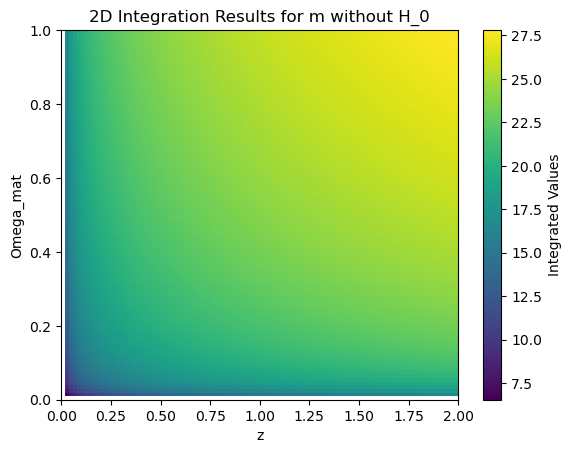

In [79]:
#Plotting the result of integration
#plt.figure(figsize=(10, 6))
plt.imshow(computed_values.T, origin='lower', extent=(0, 2, 0, 1), aspect='auto', cmap='viridis')
#note .T transpose the grid of computed values since imshow wants (y, x) and not (x, y)
plt.colorbar(label='Integrated Values')
plt.xlabel('z')
plt.ylabel('Omega_mat')
plt.title('2D Integration Results for m without H_0')
plt.grid(False)
plt.show()

/tmp/ipykernel_2126/3792232870.py:4: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  interp_func = interp2d(z_values, Omega_mat_values, computed_values, kind='linear')
/tmp/ipykernel_2126/3792232870.py:11: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, p

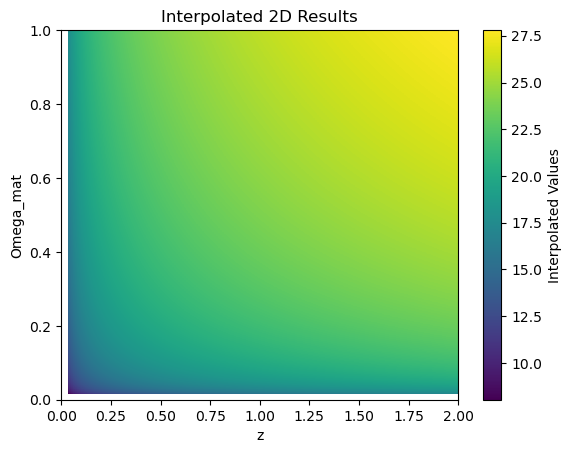

In [80]:
#Performing 2D interpolation 

# Create the interpolation function
interp_func = interp2d(z_values, Omega_mat_values, computed_values, kind='linear')

# Define the range of z and Omega_mat for the interpolated grid
interp_z_values = np.linspace(0, 2, 200)  # Increase the number of points for smoother interpolation
interp_Omega_mat_values = np.linspace(0, 1, 200)

# Generate the interpolated values using the interpolation function
interp_computed_values = interp_func(interp_z_values, interp_Omega_mat_values)

# Plot the interpolated values
#plt.figure(figsize=(10, 6))
plt.imshow(interp_computed_values.T, origin='lower', extent=(0, 2, 0, 1), aspect='auto', cmap='viridis')
plt.colorbar(label='Interpolated Values')
plt.xlabel('z')
plt.ylabel('Omega_mat')
plt.title('Interpolated 2D Results')
plt.grid(False)
plt.show()